In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys


sys.path.append("..")
from skyrim import ModelPrediction
import numpy as np


/Users/m/miniconda3/envs/weather_metal/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from skyrim import estimate_pressure_hpa
import matplotlib.pyplot as plt

In [7]:
sys.path

['/Users/m/Projects/skyrim/notebooks',
 '/Users/m/miniconda3/envs/weather_metal/lib/python310.zip',
 '/Users/m/miniconda3/envs/weather_metal/lib/python3.10',
 '/Users/m/miniconda3/envs/weather_metal/lib/python3.10/lib-dynload',
 '',
 '/Users/m/miniconda3/envs/weather_metal/lib/python3.10/site-packages',
 '..']

In [6]:
from skyrim.plotting import plot_wind_components

ModuleNotFoundError: No module named 'skyrim.plotting'

In [4]:
# Example: Estimate pressure at 1000 meters elevation
pressure_at_1000m = estimate_pressure_hpa(1000)
print(f"Estimated pressure at 1000 meters elevation: {pressure_at_1000m} Pa")

Estimated pressure at 1000 meters elevation: 898.7476493918435 Pa


In [5]:
UK_WIND_FARMS = {
    "1": {"latitude": 53.9362, "longitude": 1.574050, "isobaricInhPa": 1000},
    "2": {"latitude": 53.8794, "longitude": 1.934730, "isobaricInhPa": 1000},
    "3": {"latitude": 56.5872, "longitude": -1.735280, "isobaricInhPa": 1000},
}

In [6]:
output_0322 = "/Users/m/Projects/skyrim/results/panguweather/date=20240322__time=12:00__6__input=cds.grib"
output_0323 = "/Users/m/Projects/skyrim/results/panguweather/date=20240323__time=12:00__6__input=cds.grib"
output_0324 = "/Users/m/Projects/skyrim/results/panguweather/date=20240324__time=12:00__6__input=cds.grib"

In [7]:
preds_0322 = ModelPrediction(filepath=output_0322)
preds_0323 = ModelPrediction(filepath=output_0323)
preds_0324 = ModelPrediction(filepath=output_0324)

skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/Users/m/miniconda3/envs/weather_metal/lib/python3.10/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/m/miniconda3/envs/weather_metal/lib/python3.10/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=2.0)
skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/Users/m/miniconda3/envs/weather_metal/lib/python3.10/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/m/miniconda3/envs/weather_metal/lib/python3.10/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.da

In [8]:
# Get wind speeds for wind farms 1:
data_1 = {
    "20240322": {
        **preds_0322.point_wind_uv(**UK_WIND_FARMS["1"], step=0)},
    "20240323": {
        **preds_0323.point_wind_uv(**UK_WIND_FARMS["1"], step=0)},
    "20240324": {
        **preds_0324.point_wind_uv(**UK_WIND_FARMS["1"], step=0)}
}

data_2 = {
    "20240322": {
        **preds_0322.point_wind_uv(**UK_WIND_FARMS["2"], step=0)},
    "20240323": {
        **preds_0323.point_wind_uv(**UK_WIND_FARMS["2"], step=0)},
    "20240324": {
        **preds_0324.point_wind_uv(**UK_WIND_FARMS["2"], step=0)}
}

data_3 = {
    "20240322": {
        **preds_0322.point_wind_uv(**UK_WIND_FARMS["3"], step=0)},
    "20240323": {
        **preds_0323.point_wind_uv(**UK_WIND_FARMS["3"], step=0)},
    "20240324": {
        **preds_0324.point_wind_uv(**UK_WIND_FARMS["3"], step=0)}
}


In [9]:
data_1

{'20240322': {'u': <xarray.DataArray 'u' ()> Size: 4B
  [1 values with dtype=float32]
  Coordinates:
      time               datetime64[ns] 8B ...
      step               timedelta64[ns] 8B 00:00:00
      isobaricInhPa      float64 8B 1e+03
      latitude           float64 8B 54.0
      longitude          float64 8B 1.5
      valid_time         datetime64[ns] 8B ...
      meanSea            float64 8B ...
      heightAboveGround  float64 8B ...
  Attributes: (12/29)
      GRIB_paramId:                             131
      GRIB_dataType:                            fc
      GRIB_numberOfPoints:                      1038240
      GRIB_typeOfLevel:                         isobaricInhPa
      GRIB_stepUnits:                           1
      GRIB_stepType:                            instant
      ...                                       ...
      GRIB_name:                                U component of wind
      GRIB_shortName:                           u
      GRIB_units:             

In [6]:
from skyrim.skyrim.plotting import plot_wind_components
plot_wind_components(data_1,'Farm 1')
plot_wind_components(data_2,'Farm 2')
plot_wind_components(data_3,'Farm 3')

ModuleNotFoundError: No module named 'skyrim.skyrim.plotting'; 'skyrim.skyrim' is not a package

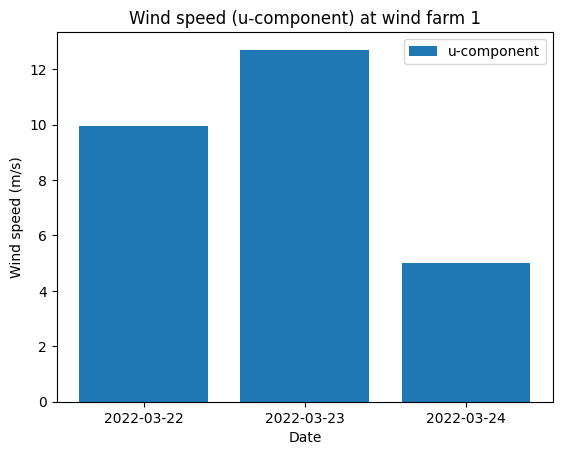

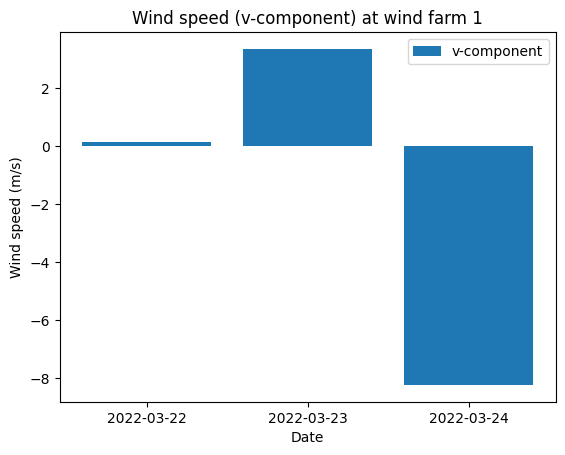

In [10]:
dates = ["2022-03-22", "2022-03-23", "2022-03-24"]
u_wind_speeds = [u1_0322, u2_0323, u3_0324]  # u-component wind speeds
v_wind_speeds = [v1_0322, v2_0323, v3_0324]  # v-component wind speeds
# Plotting u-component wind speeds
plot_wind_speed(dates, u_wind_speeds, 'u')

# Plotting v-component wind speeds
plot_wind_speed(dates, v_wind_speeds, 'v')

In [ ]:
preds.point()

In [218]:
x = preds.prediction.data_vars
dir(x)
x
# preds.prediction.sel(x)

xarray.core.utils.Frozen

In [219]:
preds.prediction.dims

FrozenMappingWarningOnValuesAccess({'step': 2, 'isobaricInhPa': 13, 'latitude': 721, 'longitude': 1440})

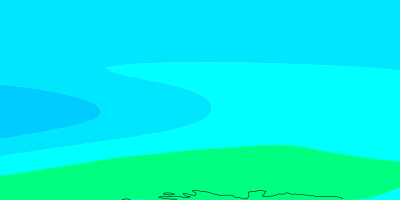

In [241]:
s = preds.slice(
    latitude=slice(90, 80),
    longitude=slice(10, 30),
    variable="t",
    isobaricInhPa=slice(1000),
)
import climetlab as cml

cml.plot_map(s.isel(step=0))

In [231]:
preds.prediction.coords

Coordinates:
    time               datetime64[ns] 8B ...
  * step               (step) timedelta64[ns] 16B 00:00:00 06:00:00
  * isobaricInhPa      (isobaricInhPa) float64 104B 1e+03 925.0 ... 100.0 50.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (step) datetime64[ns] 16B ...
    meanSea            float64 8B ...
    heightAboveGround  float64 8B ...

In [226]:
list(preds.prediction.data_vars)

['z', 'q', 't', 'u', 'v', 'msl', 'u10', 'v10']

In [134]:
u10_preds_point = preds.point(37.5665, 126.9780, None, "u10")
u10_preds_point.data

array(1.2987766, dtype=float32)

In [172]:
x = preds.slice(
    latitude=slice(59, 49),
    longitude=slice(352, 2),
    variables=["t"],
)

ValueError: The input coordinate is not sorted in increasing order along axis 0. This can lead to unexpected results. Consider calling the `sortby` method on the input DataArray. To plot data with categorical axes, consider using the `heatmap` function from the `seaborn` statistical plotting library.

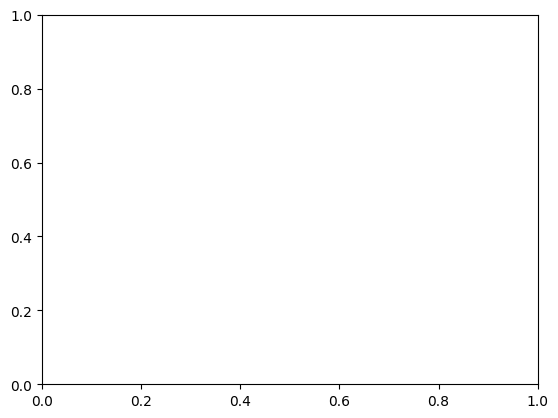

In [194]:
x.sel(isobaricInhPa=1000).isel(step=1).t.plot.pcolormesh(x="longitude", y="latitude")

In [192]:
import climetlab as cml

cml.plotting_options(width=400, foreground=True)

cml.plot_map(x.sel(isobaricInhPa=1000).isel(step=1))

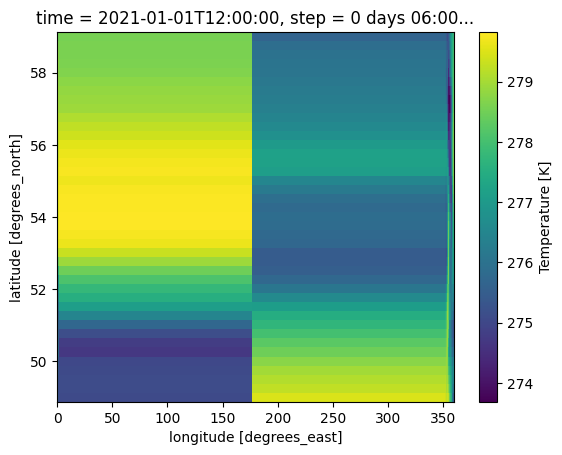

In [186]:
x.sel(isobaricInhPa=1000).isel(step=1).t.sortby("longitude").plot(
    x="longitude", y="latitude"
)

TypeError: Axes.hist() got multiple values for argument 'x'

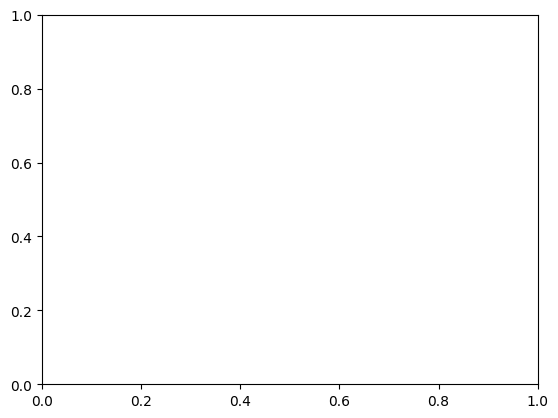

In [167]:
u10_preds_slice.u10.plot(x="longitude", y="latitude")

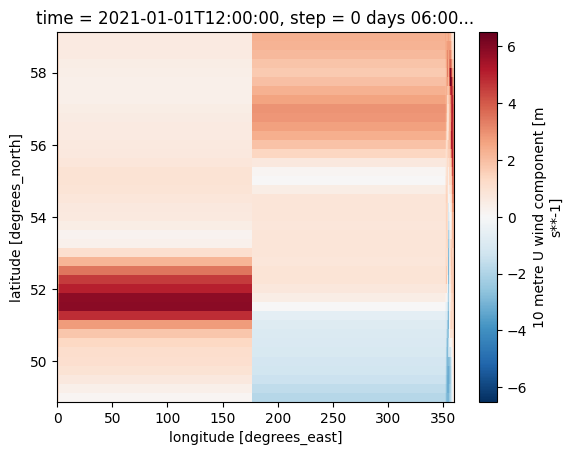

In [168]:
u10_preds_slice.isel(step=1)["u10"].sortby("longitude").plot(
    x="longitude", y="latitude"
)

In [149]:
u10_preds_slice["u10"].sel(step=1).plot()

KeyError: "not all values found in index 'step'. Try setting the `method` keyword argument (example: method='nearest')."

In [117]:
preds.prediction.sel(longitude=slice(-8, 12))

<xarray.Dataset> Size: 19MB
Dimensions:            (step: 2, isobaricInhPa: 13, latitude: 721, longitude: 49)
Coordinates:
    time               datetime64[ns] 8B ...
  * step               (step) timedelta64[ns] 16B 00:00:00 06:00:00
  * isobaricInhPa      (isobaricInhPa) float64 104B 1e+03 925.0 ... 100.0 50.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 392B 0.0 0.25 0.5 ... 11.5 11.75 12.0
    valid_time         (step) datetime64[ns] 16B ...
    meanSea            float64 8B ...
    heightAboveGround  float64 8B ...
Data variables:
    z                  (step, isobaricInhPa, latitude, longitude) float32 4MB ...
    q                  (step, isobaricInhPa, latitude, longitude) float32 4MB ...
    t                  (step, isobaricInhPa, latitude, longitude) float32 4MB ...
    u                  (step, isobaricInhPa, latitude, longitude) float32 4MB ...
    v                  (step, isobaricInhPa, latitude, longitude) float32 4MB ...
    msl                (step, latitude, longitude) float32 283kB ...
    u10                (step, latitude, longitude) float32 283kB ...
    v10                (step, latitude, longitude) float32 283kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-04-06T14:23 GRIB to CDM+CF via cfgrib-0.9.1...

In [106]:
w_u_100m = preds.slice(latitude=slice(49, 59), longitude=slice(352, 8), variables="u")

In [107]:
w_u_100m.data.s

(2, 13, 0, 0)

In [69]:
lat, lon = 37.5665, 126.9780
preds.prediction[["msl", "z"]]

<xarray.Dataset> Size: 116MB
Dimensions:            (step: 2, latitude: 721, longitude: 1440,
                        isobaricInhPa: 13)
Coordinates:
    time               datetime64[ns] 8B 2021-01-01T12:00:00
  * step               (step) timedelta64[ns] 16B 00:00:00 06:00:00
  * isobaricInhPa      (isobaricInhPa) float64 104B 1e+03 925.0 ... 100.0 50.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (step) datetime64[ns] 16B 2021-01-01T12:00:00 2021-01-...
    meanSea            float64 8B ...
    heightAboveGround  float64 8B ...
Data variables:
    msl                (step, latitude, longitude) float32 8MB ...
    z                  (step, isobaricInhPa, latitude, longitude) float32 108MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-04-06T13:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [51]:
preds.coords, preds.variables

(Coordinates:
     time               datetime64[ns] 8B ...
   * step               (step) timedelta64[ns] 16B 00:00:00 06:00:00
   * isobaricInhPa      (isobaricInhPa) float64 104B 1e+03 925.0 ... 100.0 50.0
   * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
   * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
     valid_time         (step) datetime64[ns] 16B 2021-01-01T12:00:00 2021-01-...
     meanSea            float64 8B ...
     heightAboveGround  float64 8B ...,
 Data variables:
     z        (step, isobaricInhPa, latitude, longitude) float32 108MB ...
     q        (step, isobaricInhPa, latitude, longitude) float32 108MB ...
     t        (step, isobaricInhPa, latitude, longitude) float32 108MB ...
     u        (step, isobaricInhPa, latitude, longitude) float32 108MB ...
     v        (step, isobaricInhPa, latitude, longitude) float32 108MB ...
     msl      (step, latitude, longitude) float32 8MB ...
     u10      (step, l

In [64]:
preds.prediction["t"].data.shape

(2, 13, 721, 1440)

In [58]:
preds.prediction.isel(step=0).sel(latitude=37.5, longitude=127.0, method="nearest").sel(
    dim="t"
).plot()

KeyError: "'dim' is not a valid dimension or coordinate for Dataset with dimensions FrozenMappingWarningOnValuesAccess({'isobaricInhPa': 13})"